In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import pandas as pd


In [7]:
'''
ДДЗ
Задание 9.
'''
#Вывести список всех действующих лиц произведения#
file = open('Hamlet.txt','r')
s1 = ''
s = []

for line in file.readlines():
    first = line.split()
    #print ('ТУТ', first)
    for i in first:
        if i.isupper() and i.isalpha() and len(i) > 3:
            s1 = s1 + i
            #print (s1)
        else:
            s.append(s1)
            s1 = '' 
        #print(s1)
    s.append(s1)
#print(s)

uniq = []
b = ''


for i in s:
    if i not in uniq and i != '':
        uniq.append(i)
        #print (uniq)

        
b= ', '.join(uniq)
print('Список действующих лиц:',b)    


 

file.close()


Список действующих лиц: BARNARDO, FRANCISCO, HORATIO, MARCELLUS, KING, LAERTES, POLONIUS, HAMLET, QUEEN, OPHELIA, GHOST, REYNALDO, ROSENCRANTZ, GUILDENSTERN, VOLTEMAND, FIRSTPLAYER, PLAYER, PROLOGUE, PLAYERKING, PLAYERQUEEN, LUCIANUS, FORTINBRAS, CAPTAIN, GENTLEMAN, MESSENGER, SAILOR, GRAVEDIGGER, OTHER, DOCTOR, OSRIC, LORD, AMBASSADOR


In [8]:
#Найти самое частое слово в произведении, не являющееся именем одного из действующих лиц (если их несколько, то первое)#
file = open('Hamlet.txt','r')
s = file.read().upper()
#print (s)
s1 = ''
for i in s:
    if i.isalpha() or i == ' ' or i == '\n': # здесь избавляемся от ненужных знаков
        s1 = s1 + i 
s2 = s1.split() # s2- это список слов текста

        
max_num = 0 
word = ''
for i in range(len(s2)):
    num = s2.count(s2[i])
    if i not in uniq and num > max_num:
        max_num = num
        word = s2[i]
print ('Самое частое слово:', word,'Встречается:',max_num,'раз')            
            
    

file.close()

Самое частое слово: THE Встречается: 1080 раз


In [9]:
#Найти самое длинное слово в произведении (если их несколько, то первое)#
file = open('Hamlet.txt','r')
s = file.read()
text = s.split()
max_len_word = text[0]
for i in text:
    if len(i) > len(max_len_word):
        max_len_word = i
print (max_len_word)        
file.close()

tragical-comical-historical-pastoral,


In [10]:
#Вывести предложение, содержащее наибольшее количество различных (английских) букв (если их несколько, то первое)#
file = open('Hamlet.txt','r')
s = file.read()

new_list = []
new_s = ''
for i in s:
    if  i.isalpha() or i == ',' or i == '-' or i == '(' or i == ' ' or i == '' or i == '=':
        new_s =new_s + i
    else:    
        new_list.append(new_s)
        new_s = ''
        
new_list.append(new_s) 
#print (new_list)

def func (z):
    z1 = ''
    for i in z:
        if i.isalpha() and i not in z1 :
            z1 = z1 + i
    return z1    

final_list = list(map(func,new_list))
#print (final_list)


max_len_str = final_list[0]
max_len_str_2 = ''
for i in range(len(final_list)):
        if len(final_list[i]) > len(max_len_str):
            max_len_str = new_list[i]
            max_len_str_2 = final_list[i]
#print (max_len_str, len(max_len_str_2))                        
print ('Предложение, содержащее наибольшее количество различных букв:',max_len_str, 'Количество различных букв:', len(max_len_str_2))            
        


    
file.close()

Предложение, содержащее наибольшее количество различных букв: HAMLET  You cannot, sir, take from me anything that I Количество различных букв: 24


In [12]:
'''
ДДЗ
Задание 10

Отобразить динамику цен обеих компаний на одном графике.
Оценить коэффициенты регрессии вектора цен одного актива на другой
Представить другой актив линейной комбинацией от первого
Построить график
Добавить линию среднего
Добавить верхний и нижний “коридоры”, отклоняющиеся от среднего на величину стандартного отклонения

'''

'\nДДЗ\nЗадание 10\n\nОтобразить динамику цен обеих компаний на одном графике.\nОценить коэффициенты регрессии вектора цен одного актива на другой\nПредставить другой актив линейной комбинацией от первого\nПостроить график\nДобавить линию среднего\nДобавить верхний и нижний “коридоры”, отклоняющиеся от среднего на величину стандартного отклонения\n\n'

In [13]:
df4['Date'] = pd.to_datetime(df4['Date'], format='%m/%d/%Y')
df4.index = pd.to_datetime(df4['Date'])
df4.drop(['Date'],axis=1,inplace=True)

NameError: name 'df4' is not defined

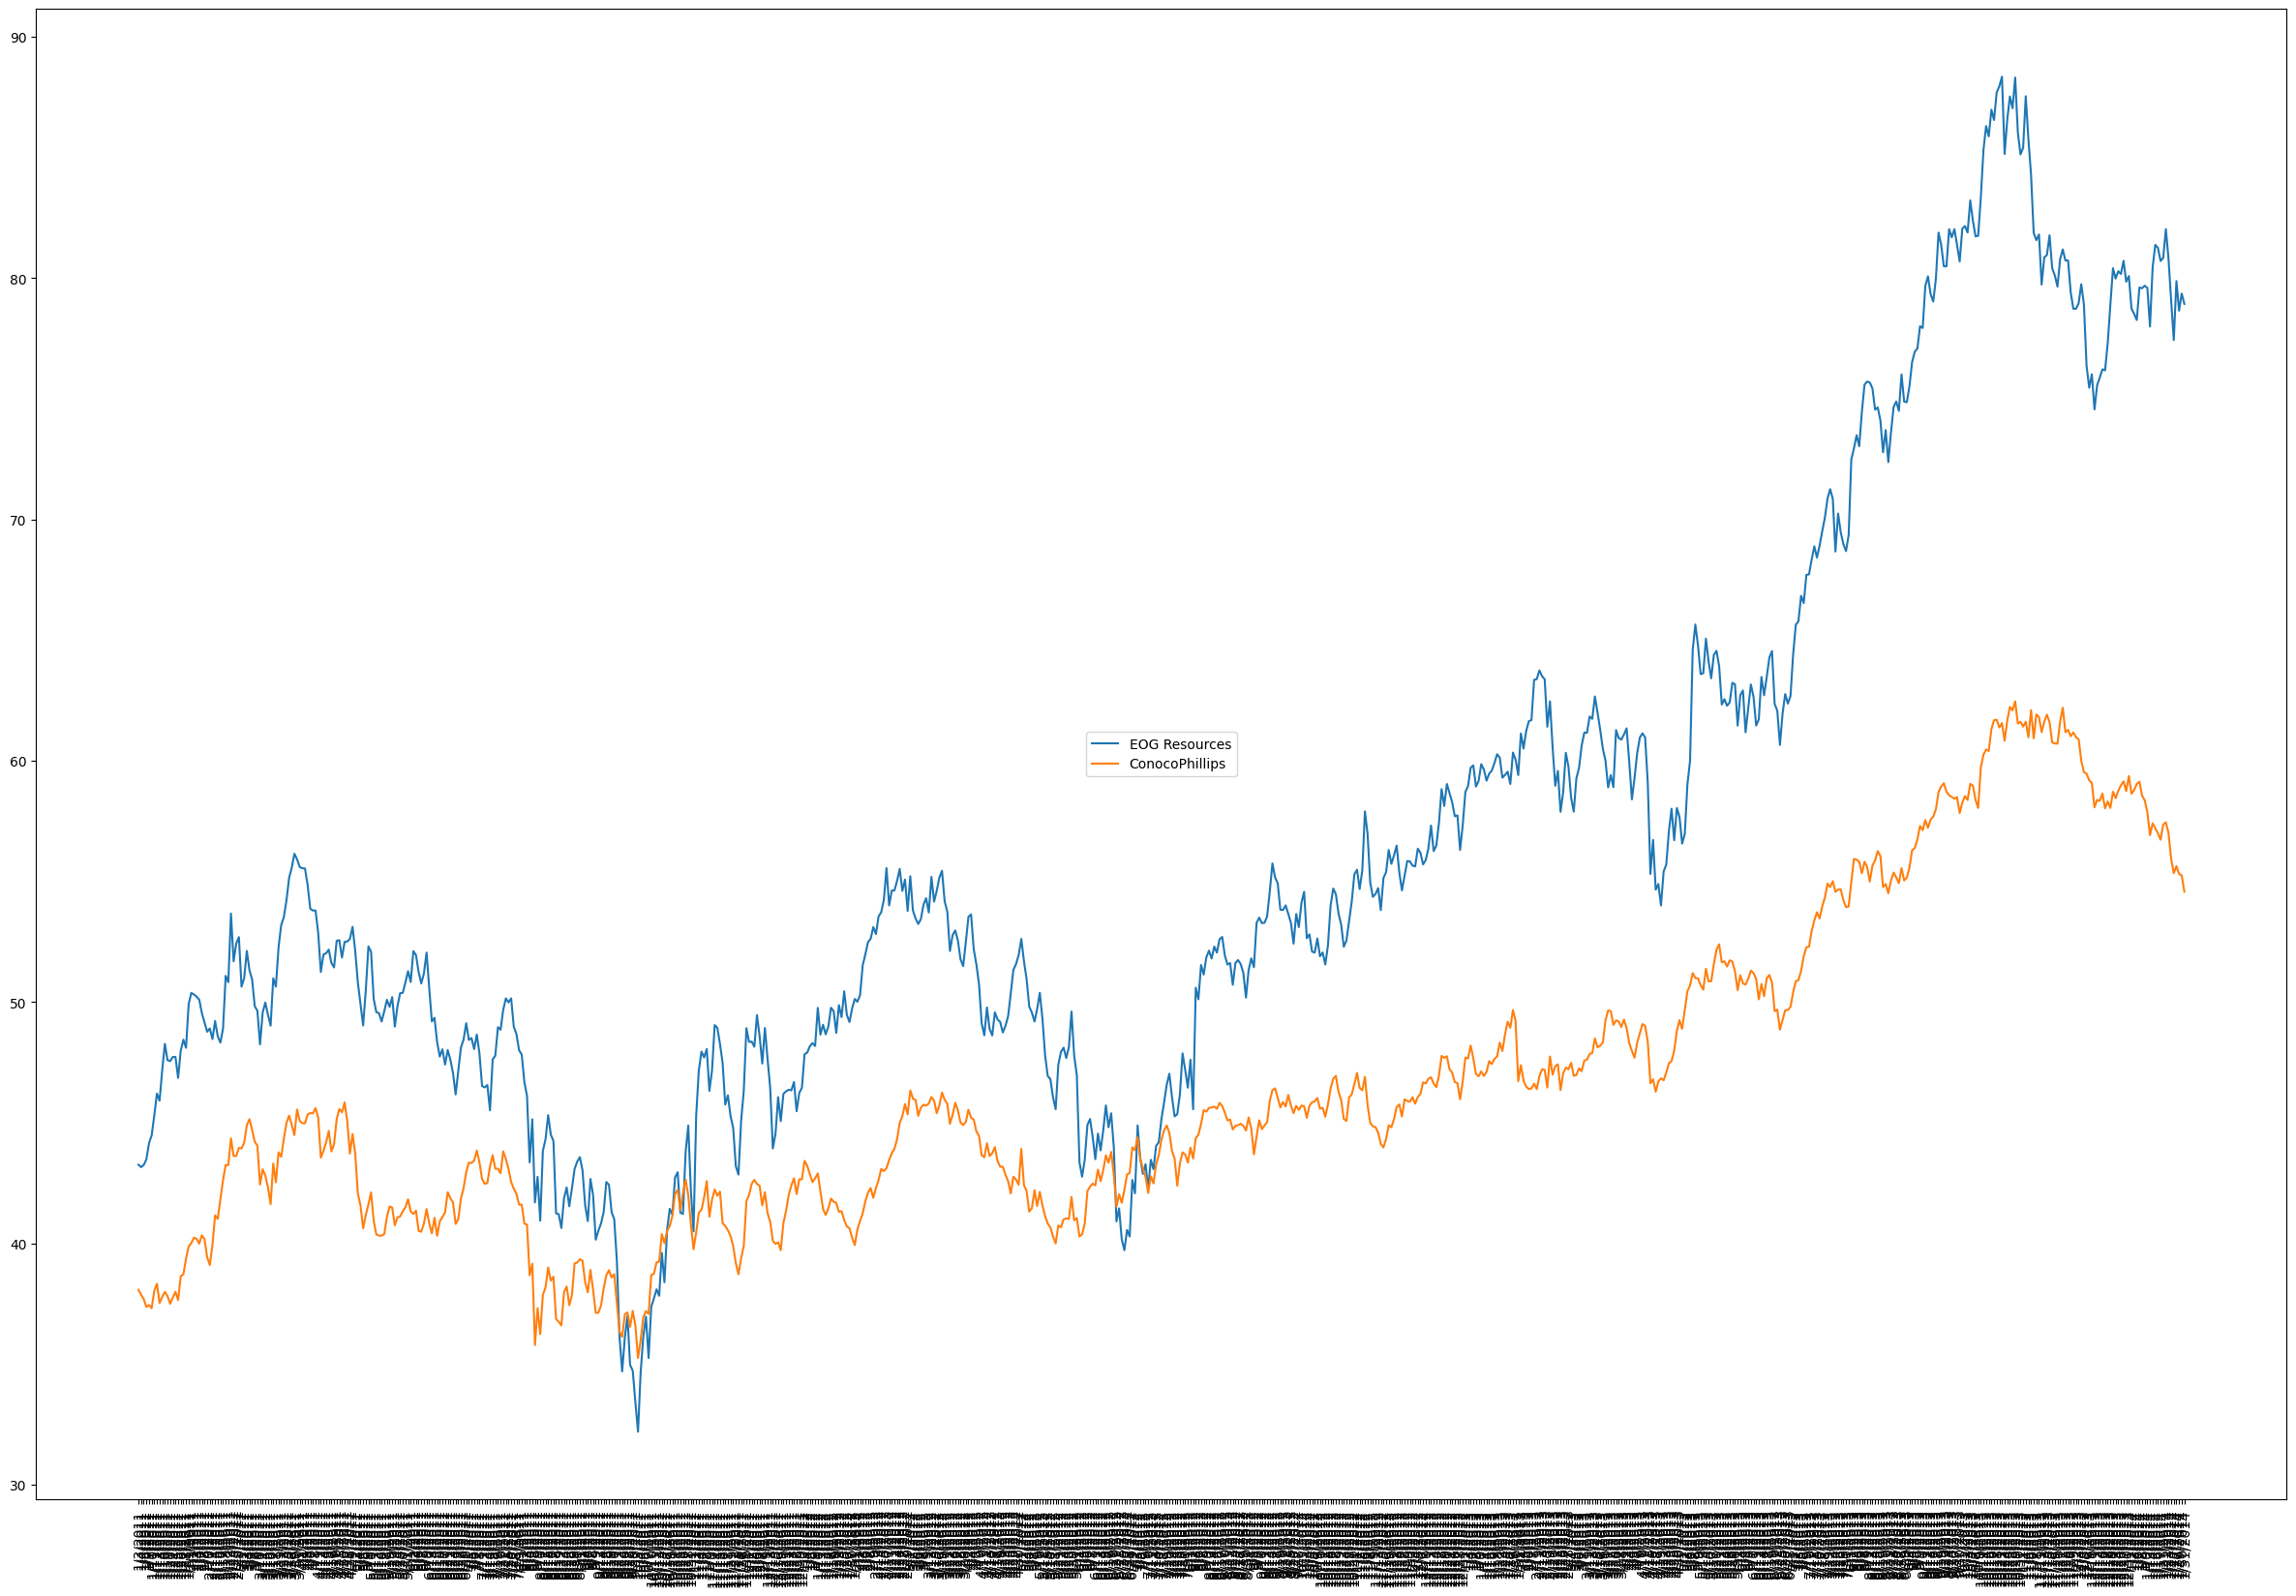

In [14]:
#Отобразить динамику цен обеих компаний на одном графике.#
df4 = pd.read_csv('eog_cop.xlsx - eog.csv')
plt.figure(figsize=(30,20))
plt.plot(df4['Date'],df4['EOG'],linestyle='solid',label = 'EOG Resources')
plt.plot(df4['Date'],df4['COP'],linestyle='solid',label = 'ConocoPhillips')
plt.xticks(rotation=90)
plt.legend(loc = 10)
plt.show()

коэффициенты регрессии: 17.64061323709057 0.5103856768294341


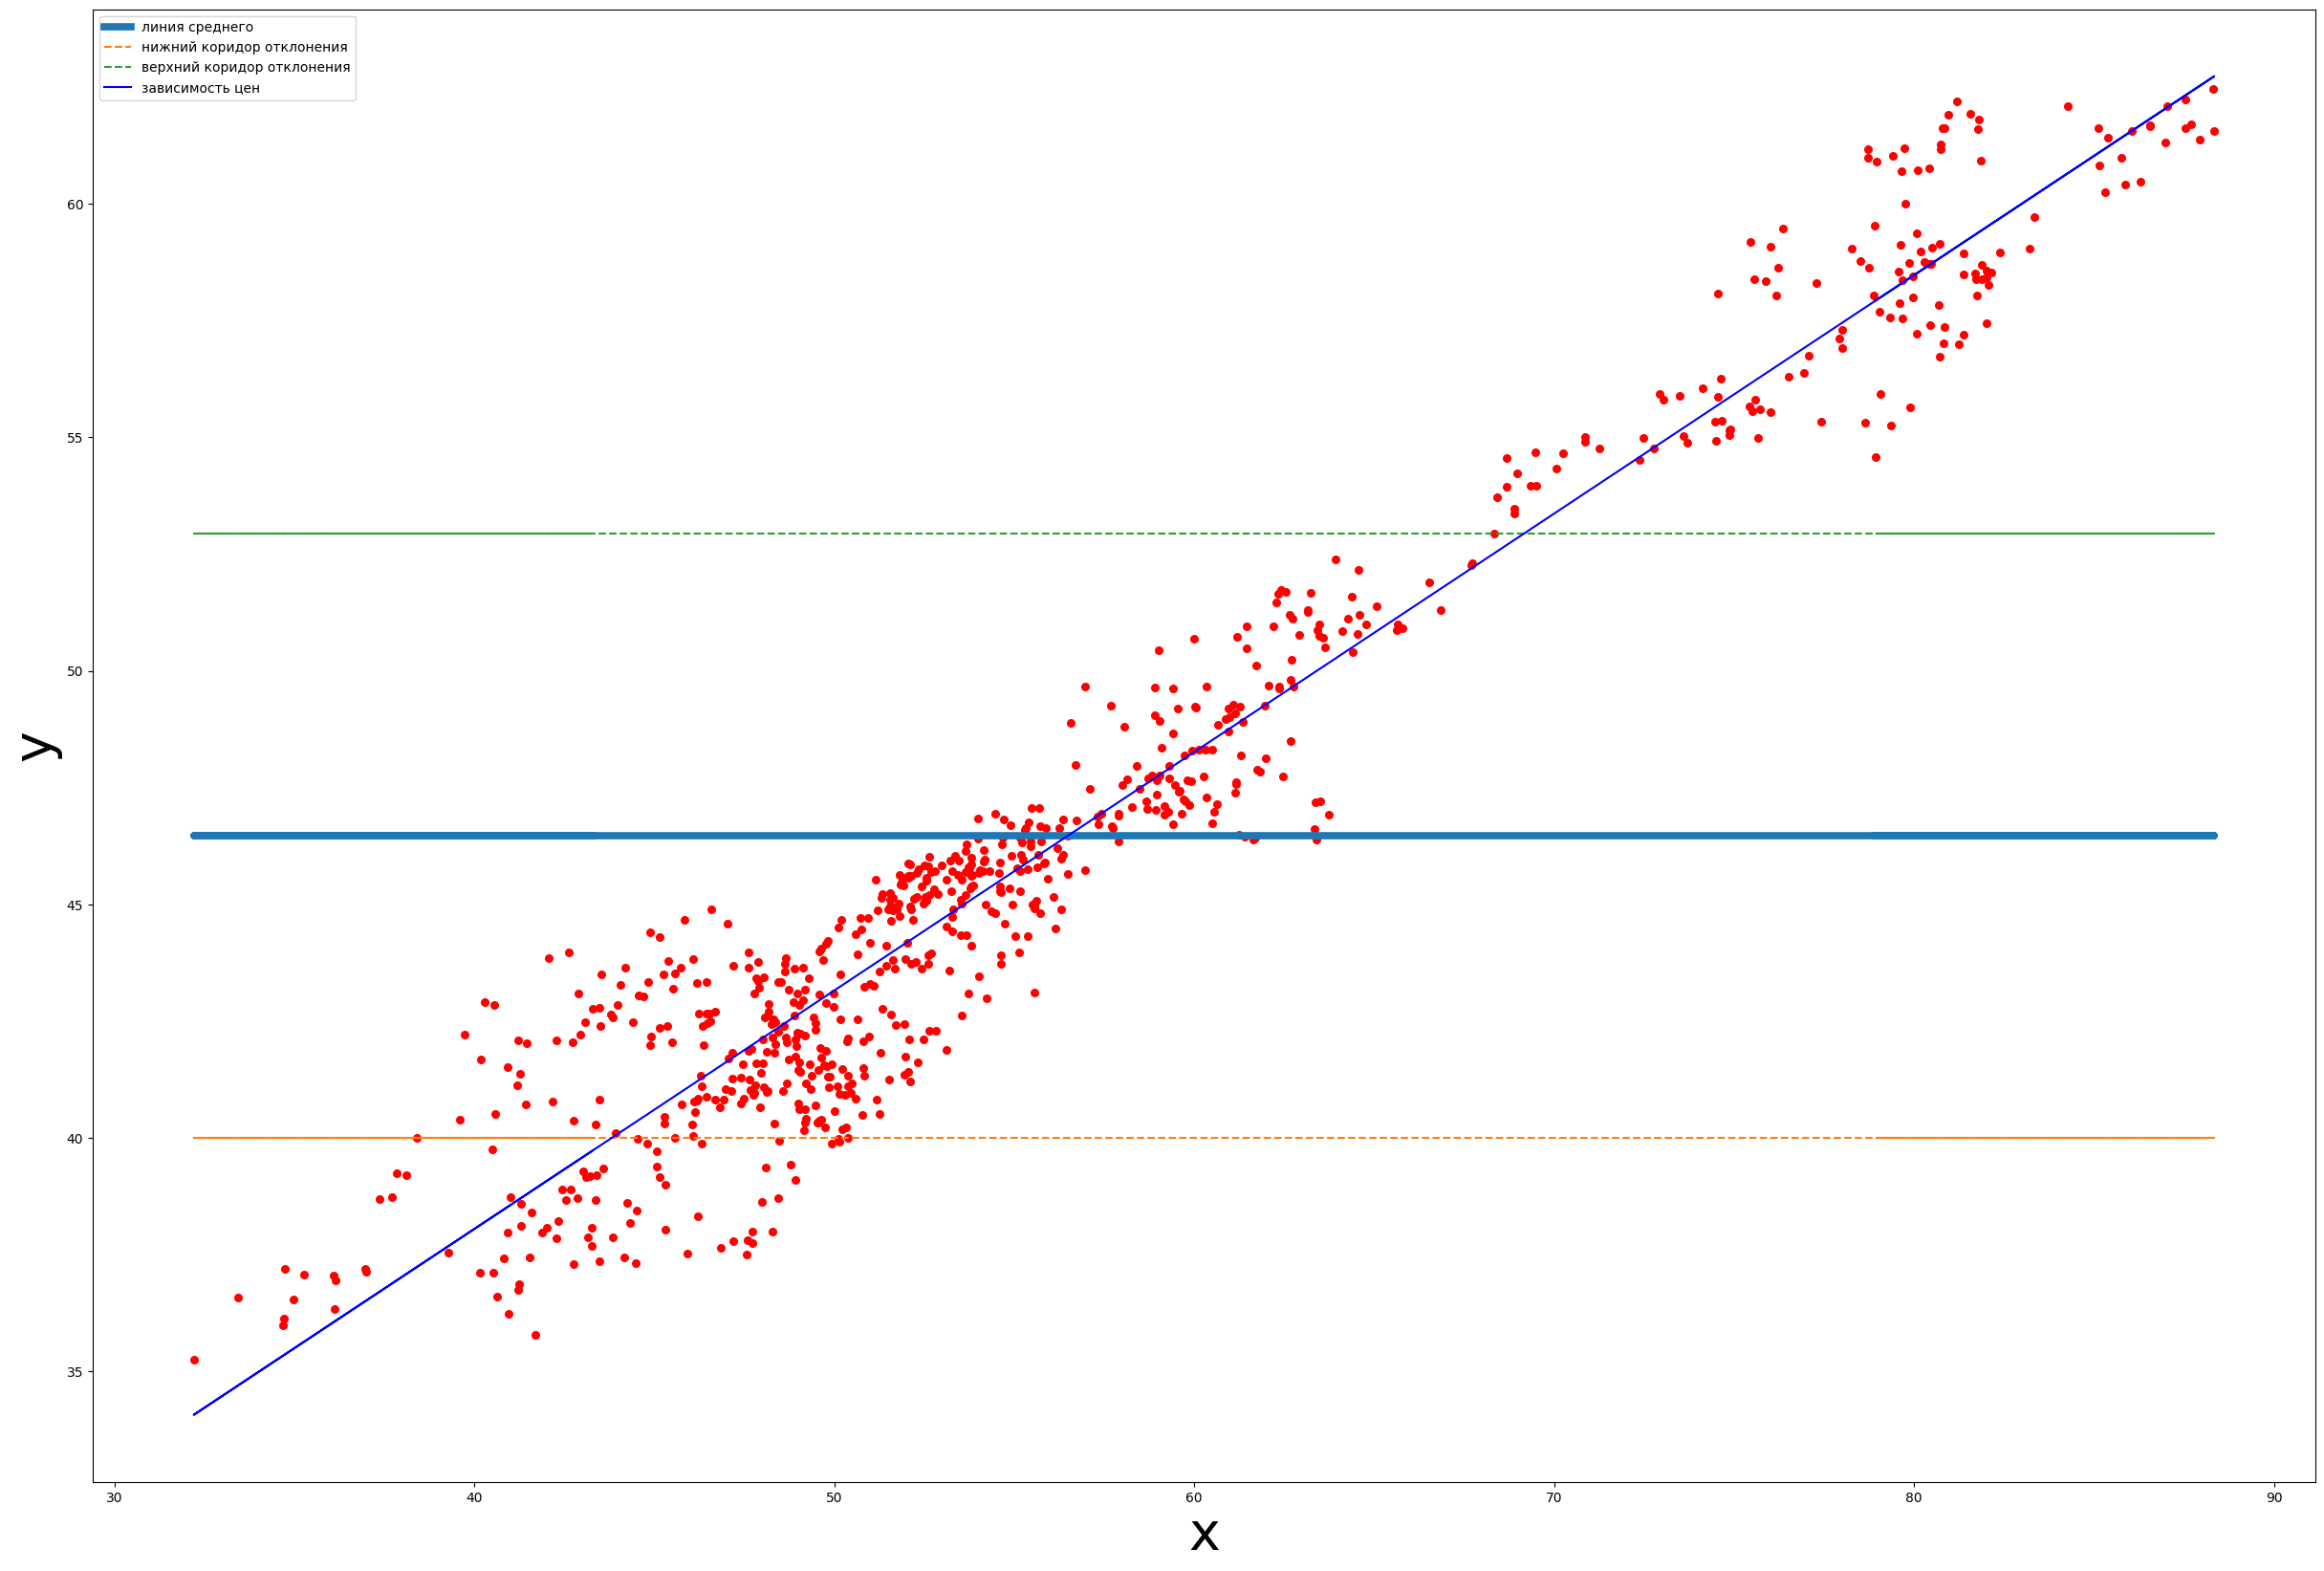

In [15]:
x = df4['EOG']
y = df4['COP']

def estimate_coef(x, y):
    n = np.size(x)
    m_x = np.mean(x)
    m_y = np.mean(y)
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x
    return (b_0, b_1) # коэффициенты регрессии

def plot_regression_line(x, y, b):
    plt.figure(figsize=(30,20))
    plt.scatter(x, y, color = "r", marker = "o", s = 30)
    y_mean = [np.mean(y)]*len(x)# среднее значение y (список)
    plt.plot(x, y_mean, linewidth = '5.5', label = 'линия среднего') # линия среднего
    down_koridor_y = [(np.mean(y)) - (np.std(y))]*len(x)
    up_koridor_y = [(np.mean(y)) + (np.std(y))]*len(x)
    plt.plot(x, down_koridor_y, linestyle='--', label = 'нижний коридор отклонения')# нижний коридор отклонения 
    plt.plot(x, up_koridor_y, linestyle='--', label = 'верхний коридор отклонения')# верхний коридор отклонения
    y_pred = b[0] + b[1]*x   #Представить другой актив линейной комбинацией от первого
    plt.plot(x, y_pred, color = "b",label = 'зависимость цен') 
    plt.xlabel('x', size = '40')
    plt.ylabel('y', size = '40')
    plt.legend(loc = 0)    
    plt.show()

b = estimate_coef(x, y)
print('коэффициенты регрессии:',b[0], b[1])


plot_regression_line(x, y, b)

